In [2]:
import os
import time
import numpy as np 
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy import table
from astropy.table import join
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt 

#Load the catalog 
catversion = 'Farmer'  # this string can be either 'Classic' or 'Farmer'
dir_in = '/Users/yokisalcedo/Desktop/Emission-Line-Galaxy-Target-Selection/data/'   
dir_out = '/Users/yokisalcedo/Desktop/Emission-Line-Galaxy-Target-Selection/selection_scripts/' # the directory where the output of this notebook will be stored
# Upload the main catalogue
hsc_cat = table.Table.read(dir_in+'HSC.fits'.format(catversion),format='fits',hdu=1).to_pandas()

def flux_to_mag(flux):
    return -2.5*np.log10(flux*1e-9) + 8.90
# extinction corrected mags (extinction is negligible for XMM-LSS)
hsc_cat["i_mag"] = flux_to_mag(hsc_cat["i_cmodel_flux"])-hsc_cat["a_i"]
hsc_cat["r_mag"] = flux_to_mag(hsc_cat["r_cmodel_flux"])-hsc_cat["a_r"]
hsc_cat["z_mag"] = flux_to_mag(hsc_cat["z_cmodel_flux"])-hsc_cat["a_z"]
hsc_cat["g_mag"] = flux_to_mag(hsc_cat["g_cmodel_flux"])-hsc_cat["a_g"]
hsc_cat["y_mag"] = flux_to_mag(hsc_cat["y_cmodel_flux"])-hsc_cat["a_y"]


hsc_cat["i_fiber_mag"] = flux_to_mag(hsc_cat["i_fiber_flux"])-hsc_cat["a_i"]
hsc_cat["i_fiber_tot_mag"] = flux_to_mag(hsc_cat["i_fiber_tot_flux"])-hsc_cat["a_i"]
hsc_cat["g_fiber_mag"] = flux_to_mag(hsc_cat["g_fiber_flux"])-hsc_cat["a_g"]
hsc_cat["g_fiber_tot_mag"] = flux_to_mag(hsc_cat["g_fiber_tot_flux"])-hsc_cat["a_g"]
hsc_cat["r_fiber_mag"] = flux_to_mag(hsc_cat["r_fiber_flux"])-hsc_cat["a_r"]
hsc_cat["r_fiber_tot_mag"] = flux_to_mag(hsc_cat["r_fiber_tot_flux"])-hsc_cat["a_r"]

## Quality cuts
# valid I-band flux
mask = np.isfinite(hsc_cat["i_cmodel_flux"]) & (hsc_cat["i_cmodel_flux"]>0)
#cmodel fit not failed
mask &= (~hsc_cat["i_cmodel_flag"].values)
#General Failure Flag
mask &= (~hsc_cat["i_sdsscentroid_flag"].values)
mask &= np.isfinite(hsc_cat["g_cmodel_flux"]) & (hsc_cat["g_cmodel_flux"]>0)
#cmodel fit not failed
mask &= (~hsc_cat["g_cmodel_flag"].values)
#General Failure Flag
mask &= (~hsc_cat["g_sdsscentroid_flag"].values)
mask &= np.isfinite(hsc_cat["r_cmodel_flux"]) & (hsc_cat["r_cmodel_flux"]>0)
#cmodel fit not failed
mask &= (~hsc_cat["r_cmodel_flag"].values)
#General Failure Flag
mask &= (~hsc_cat["r_sdsscentroid_flag"].values)
mask &= np.isfinite(hsc_cat["y_cmodel_flux"]) & (hsc_cat["y_cmodel_flux"]>0)
#cmodel fit not failed
mask &= (~hsc_cat["y_cmodel_flag"].values)
#General Failure Flag
mask &= (~hsc_cat["y_sdsscentroid_flag"].values)
mask &= np.isfinite(hsc_cat["z_cmodel_flux"]) & (hsc_cat["z_cmodel_flux"]>0)
#cmodel fit not failed
mask &= (~hsc_cat["z_cmodel_flag"].values)
#General Failure Flag
mask &= (~hsc_cat["z_sdsscentroid_flag"].values)
hsc_cat = hsc_cat[mask]


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/op

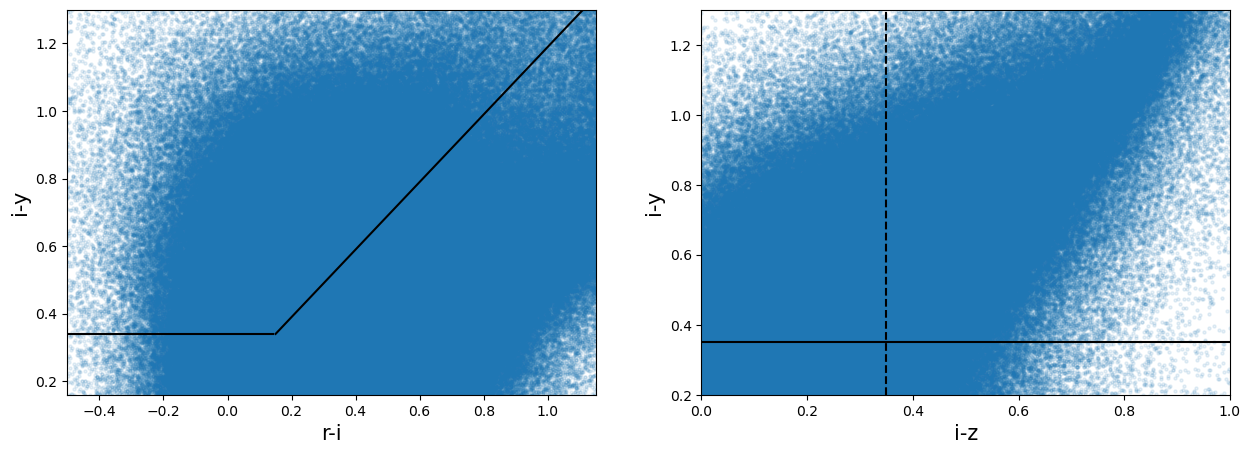

In [3]:
'''point 1 color color plot  '''
#For the first ax1 the args are (ri, iy) and for ax2 (iz, iy)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(hsc_cat['r_mag'] -  hsc_cat['i_mag'],  hsc_cat['i_mag'] -  hsc_cat['y_mag'] , s = 5, alpha = .1)
#ax1.scatter(ri[snr_mask_comb_fail], iy[snr_mask_comb_fail], c= 'red', s = 5, alpha = 1)
ax1.set_xlim(-0.5, 1.15)
ax1.set_ylim(0.16, 1.3)
ax1.set_xlabel('r-i', fontsize = 15)
ax1.set_ylabel('i-y', fontsize = 15)
x = np.arange(0.34 , 2, .05)
ax1.plot(x -0.19  ,x, c = 'black')
ax1.axhline(y = 0.34 , xmax = 0.39 , c = 'black') 


ax2.scatter( hsc_cat['i_mag'] -  hsc_cat['z_mag'],  hsc_cat['i_mag'] -  hsc_cat['y_mag'], s = 5, alpha = .1)
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.3)
ax2.set_xlabel('i-z', fontsize = 15)
ax2.set_ylabel('i-y', fontsize = 15)
ax2.axvline(x = 0.35 , ls= '--', color='black') 
ax2.axhline(y = 0.35 , color='black')


In [5]:
'''point 1 color color plot  '''

#Adding the adjusted HSC mags to the HSC catalog
hsc_cat["g_mag_cosmos"] = hsc_cat["g_mag"] + 0.10
hsc_cat["r_mag_cosmos"] = hsc_cat["r_mag"] + 0.11
hsc_cat["i_mag_cosmos"] = hsc_cat["i_mag"] + 0.11
hsc_cat["z_mag_cosmos"] = hsc_cat["z_mag"] + 0.09
hsc_cat["y_mag_cosmos"] = hsc_cat["y_mag"] + 0.11

#Colors
ri_adj = hsc_cat['r_mag_cosmos'] -  hsc_cat['i_mag_cosmos']
iz_adj = hsc_cat['i_mag_cosmos'] -  hsc_cat['z_mag_cosmos']
iy_adj = hsc_cat['i_mag_cosmos'] -  hsc_cat['y_mag_cosmos']




# Final target selection using the hsc_cat catalog with the HSC adjusted mags to be made into a script
gfib_mask = hsc_cat['g_fiber_mag'] < 24.3
gband_adj = np.logical_and(hsc_cat['g_mag_cosmos'] < 24, gfib_mask)
rfib_mask = hsc_cat['r_fiber_mag'] < 24.3
rband_adj = np.logical_and(hsc_cat['r_mag_cosmos'] < 24, rfib_mask)
inlimit_adj = np.logical_or(rband_adj, gband_adj)
cuts_iyri_adj = np.logical_and((iy_adj > 0.35),(ri_adj < iy_adj- 0.1)) 
cuts_final_adj = np.logical_and(cuts_iyri_adj, inlimit_adj)



i_d = hsc_cat['object_id'][cuts_final_adj]
ra = hsc_cat['ra'][cuts_final_adj]
dec = hsc_cat['dec'][cuts_final_adj]
gmag = hsc_cat["g_mag_cosmos"][cuts_final_adj]
rmag = hsc_cat["r_mag_cosmos"][cuts_final_adj]
imag = hsc_cat["i_mag_cosmos"][cuts_final_adj]
zmag = hsc_cat["z_mag_cosmos"][cuts_final_adj]
ymag = hsc_cat["y_mag_cosmos"][cuts_final_adj]




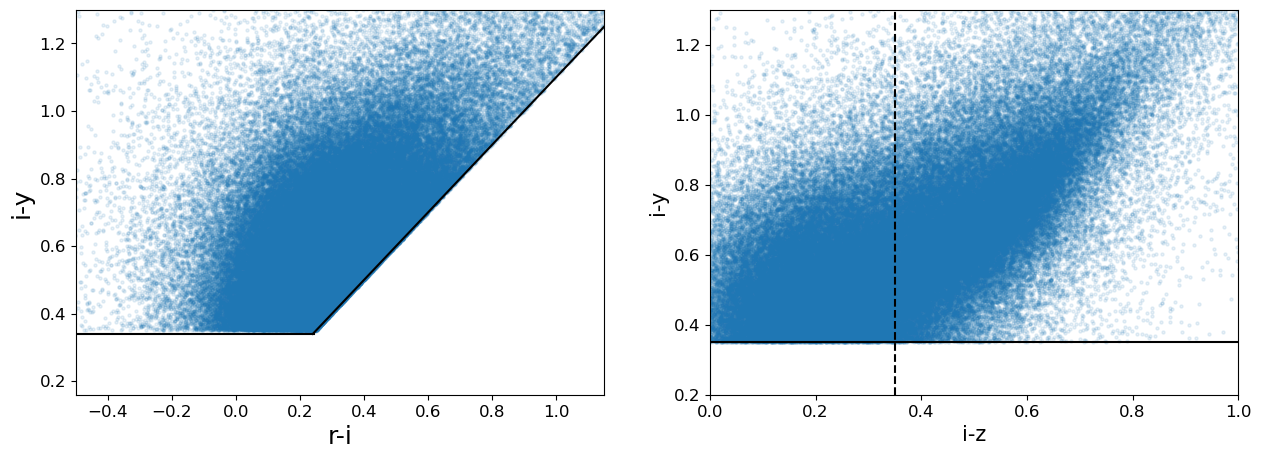

In [7]:
'''point 2 color color'''
#For the first ax1 the args are (ri, iy) and for ax2 (iz, iy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(rmag -  imag,  imag -  ymag , s = 5, alpha = .1)
#ax1.scatter(ri[snr_mask_comb_fail], iy[snr_mask_comb_fail], c= 'red', s = 5, alpha = 1)
ax1.set_xlim(-0.5, 1.15)
ax1.set_ylim(0.16, 1.3)
ax1.set_xlabel('r-i', fontsize = 18)
ax1.set_ylabel('i-y', fontsize = 18)
ax1.xaxis.set_tick_params(labelsize = 12)
ax1.yaxis.set_tick_params(labelsize = 12)
x = np.arange(0.34 , 2, .05)
ax1.plot(x -0.1  ,x, c = 'black')
ax1.axhline(y = 0.34 , xmax = 0.45 , c = 'black') 


ax2.scatter( imag -  zmag, imag -  ymag, s = 5, alpha = .1)
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.3)
ax2.set_xlabel('i-z', fontsize = 15)
ax2.set_ylabel('i-y', fontsize = 15)
ax2.axvline(x = 0.35 , ls= '--', color='black') 
ax2.axhline(y = 0.35 , color='black')
ax2.xaxis.set_tick_params(labelsize = 12)
ax2.yaxis.set_tick_params(labelsize = 12)
plt.savefig('/Users/yokisalcedo/Desktop/Emission-Line-Galaxy-Target-Selection/specz_followup_figs/targeted_color_color.png', dpi = 300)

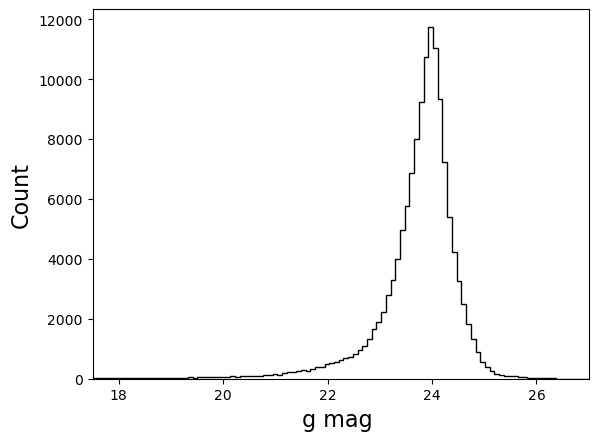

In [30]:
# #g mag histogram before color cuts were applied
# fig, ax = plt.subplots()

# ax.hist(hsc_cat["g_mag_cosmos"][cuts_final_adj], bins = np.linspace(0, 27, 300), histtype= 'step', color = 'black')
# ax.set_xlim(17.5,27)
# ax.set_xlabel('g mag ', fontsize = 16)
# ax.set_ylabel('Count', fontsize = 16)
# plt.savefig('/Users/yokisalcedo/Desktop/Emission-Line-Galaxy-Target-Selection/specz_followup_figs/hist_gmag_before_cuts.png', dpi = 300)

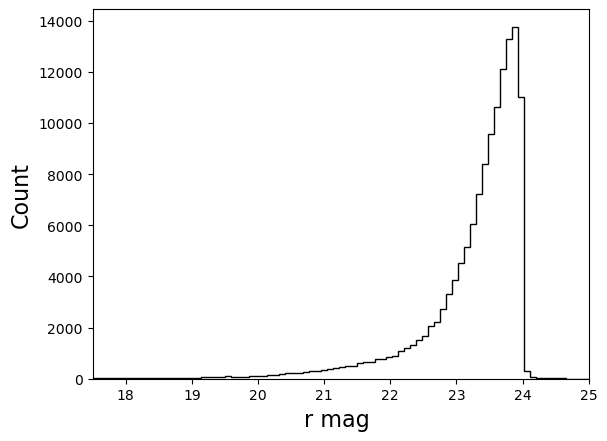

In [31]:
# #g mag histogram before color cuts were applied
# fig, ax = plt.subplots()

# ax.hist(hsc_cat["r_mag_cosmos"][cuts_final_adj], bins = np.linspace(0, 27, 300), histtype= 'step', color = 'black')
# ax.set_xlim(17.5,25)
# ax.set_xlabel('r mag ', fontsize = 16)
# ax.set_ylabel('Count', fontsize = 16)
# plt.savefig('/Users/yokisalcedo/Desktop/Emission-Line-Galaxy-Target-Selection/specz_followup_figs/hist_rmag_before_cuts.png', dpi = 300)

In [ ]:

d = {'ID_HSC': i_d, 'RA_HSC': ra, 'DEC_HSC': dec, 'gmag_HSC_offset': gmag, 'rmag_HSC_offset':rmag, 'imag_HSC_offset':imag, 'zmag_HSC_offset':zmag, 'ymag_HSC_offset':ymag}
df = pd.DataFrame(data=d)
df
#Write an if statement to check if the file exists and if it does, append the new data to a new file
if os.path.isfile('ELG_DESI-2_target_list.csv'):
    df.to_csv('ELG_DESI-2_target_list.csv', mode='w', header= True, index = False)
# df.to_csv('ELG_DESI-2_target_list.csv', index = False)
print('The number of HSC ELG targets is', len(df))
